### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! 
1. Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.
2. Для каждого нелинейного, где есть указанные проблемы, надо привести демонстрацию решения вашим методом. Без этой демонстрации считается, что обработчик соответствующей проблемы не реализован и не оценивается.

In [68]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        #print(x)
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

from typing import Callable
Func = Callable[[float], float]

EPS = 1e-14
MIN_X = 1e-6
MAX_NUMBER_OF_ITERATIONS = 30

def GIGA_MEGA_NEEEEEEEWTON(func: Func, func_derivative: Func, x: float, tol: float = 1e-12, ddfunc=None) -> list:
    solution = 0.0
    number_of_iterations = 0
    step_sizes = []
    xs = [x]
    prev_dx = None

    for _ in range(MAX_NUMBER_OF_ITERATIONS):
        number_of_iterations += 1
        f_x  = func(x)
        df_x = func_derivative(x)


        if abs(df_x) < EPS:   # <----------- check for zero derivative
            if abs(f_x) < tol: # multiple root
                dx = 0.0   
            else:
                dx = -np.sign(f_x) * MIN_X  # micro step

        elif ddfunc is not None:
            d2f_x = ddfunc(x)
            denom = df_x*df_x - f_x*d2f_x
            if abs(denom) > EPS:
                dx = -f_x * df_x / denom # <-------- modified step for newton using f'' (u=f/f')
            else:
                dx = -f_x / df_x
        else:
            dx = -f_x / df_x # <------- simple step for newton


        if prev_dx is not None:  # <----------- fix for "ping pong" problem
            if (abs(dx) > tol and abs(prev_dx) > tol and
                0.9 < abs(dx / prev_dx) < 1.5 and
                np.sign(dx) != np.sign(prev_dx)):
                dx *= 0.5

        prev_dx = dx
        step_sizes.append(abs(dx))
        x = x + dx
        xs.append(x)
        if abs(dx) < tol:
            solution = x
            return [solution, number_of_iterations, step_sizes, xs]
    solution = float('nan')
    print(f'More then {MAX_NUMBER_OF_ITERATIONS} iterations!')
    return [solution, number_of_iterations, step_sizes, xs]

#### Нелинейное уравнение 1

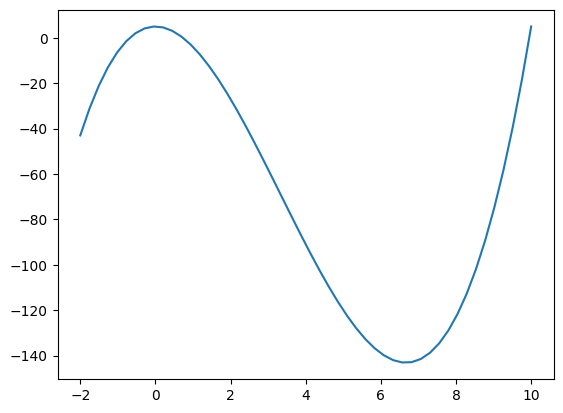

In [134]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [147]:
data1 = GIGA_MEGA_NEEEEEEEWTON(func0, dfunc0, 8) # случай 1
print('sol = ', data1[0])
print('iter = ', data1[1])
dxs1 = data1[2]

data2 = GIGA_MEGA_NEEEEEEEWTON(func0, dfunc0, 0.7) # случай 2
print('sol = ', data2[0])
print('iter = ', data2[1])
dxs2 = data2[2]
ddfunc0 = lambda x: 6*x - 20
data3 = GIGA_MEGA_NEEEEEEEWTON(func0, dfunc0, 0.0, ddfunc=ddfunc0) # случай 3
print('sol = ', data3[0])
print('iter = ', data3[1])
dxs3 = data3[2]

sol =  9.949491057914388
iter =  7
sol =  0.7346035077893033
iter =  4
sol =  -0.6840945657036895
iter =  26


### Ответы на Нелинейное уравнение 1:

#### 1) 
Потому что в 1 и 2 случае решения сходятся к разным корням(как видно на графике их 3 разных)

#### 2) 
В случае 3 происходит деление на 0 в строчке `dx = -func(x)/dfunc(x)` ($f'(x)=3x^2-20x$, а значит $f'(0)=0$)

#### Описание модификации

Так как в пункте `2)` описана проблема деления на ноль, добавляется проверка на околонулевую производную.

- Перед вычислением шага проверяем условие:  
  $|f'(x)| < \text{EPS}$  
  (то есть производная слишком мала).

- Если это так, **не выполняем деление на $f'(x)$**, а совершаем небольшой микросдвиг аргумента:  
  $$
  x \leftarrow x + \operatorname{sign}(f(x)) \cdot \text{MIN\_X}
  $$

- После микросдвига переходим к следующей итерации и пересчитываем $f(x)$ и $f'(x)$.  
  Это позволяет избежать деления на ноль и выйти из области, где производная близка к нулю.
#### 3)





/var/folders/w3/4l01d4cn60xc_qg78dq11vv40000gn/T/ipykernel_80079/1450705263.py:7: RuntimeWarning: divide by zero encountered in log
  p = [np.log(errors[i + 1] / errors[i]) / np.log(errors[i] / errors[i - 1])


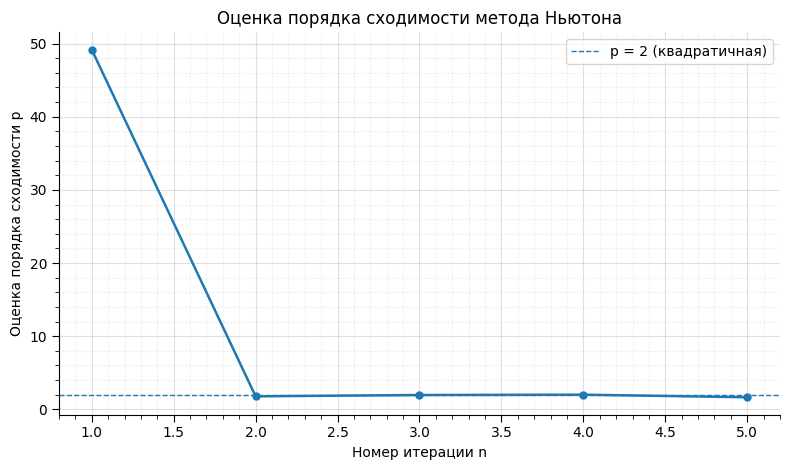

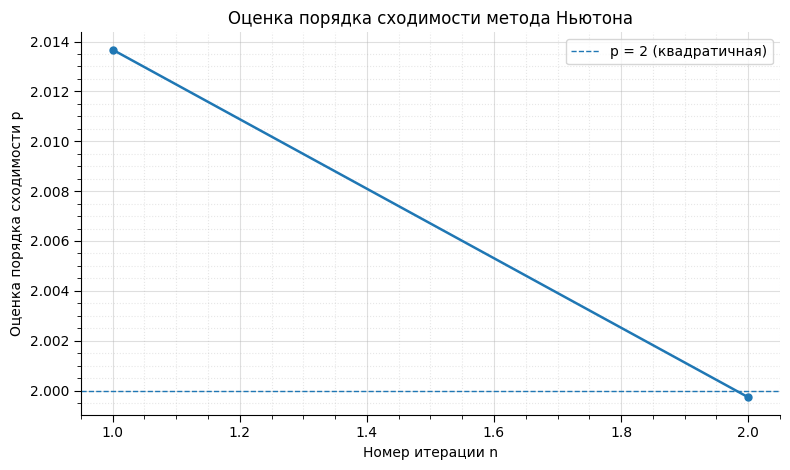

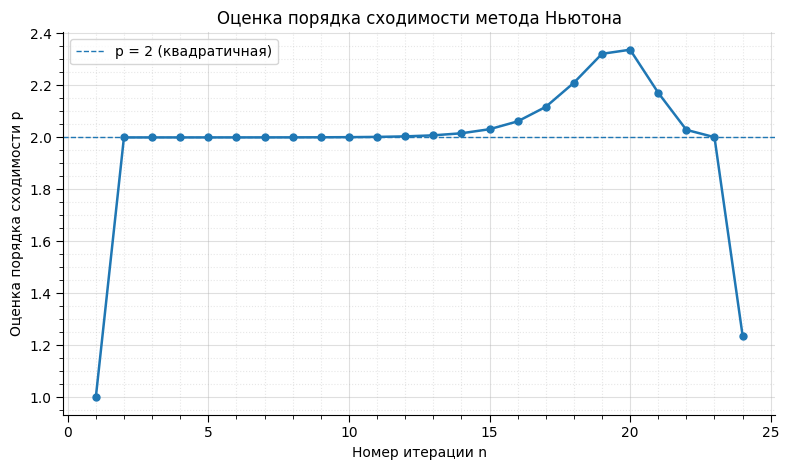

In [ ]:
def plot_degree(xs, sol):
    xs = np.array(xs, dtype=float)
    errors = np.abs(xs - sol)
    if len(errors) < 3:
        print("Недостаточно точек для оценки порядка (нужно ≥ 3).")
        return
    p = [np.log(errors[i + 1] / errors[i]) / np.log(errors[i] / errors[i - 1])
         for i in range(1, len(errors) - 1)]

    fig = plt.figure(figsize=(8, 4.8))
    ax = plt.gca()

    ax.plot(range(1, len(errors) - 1), p,
            marker='o', linestyle='-', linewidth=1.8, markersize=5)

    ax.axhline(2, linestyle='--', linewidth=1, label='p = 2 (квадратичная)')

    ax.set_xlabel('Номер итерации n')
    ax.set_ylabel('Оценка порядка сходимости p')
    ax.set_title('Оценка порядка сходимости метода Ньютона')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', length=5)
    ax.tick_params(axis='both', which='minor', length=3)

    ax.minorticks_on()
    ax.grid(True, which='major', linestyle='-', alpha=0.4)
    ax.grid(True, which='minor', linestyle=':', alpha=0.3)

    ax.legend()
    fig.tight_layout()
    plt.show()

plot_degree(data1[3], data1[0])
plot_degree(data2[3], data2[0])
plot_degree(data3[3], data3[0])

Ошибку считаем как $e_n = |x_n - x_\ast|$, оценку порядка — как
$p_n \approx \frac{\ln(e_{n+1}/e_n)}{\ln(e_n/e_{n-1})}$.

Для Ньютона у простого корня: $e_{n+1} \approx \dfrac{f''(x_\ast)}{2\,f'(x_\ast)}\,e_n^{2}$, значит асимптотически $p \approx 2$.  



#### Нелинейное уравнение 2

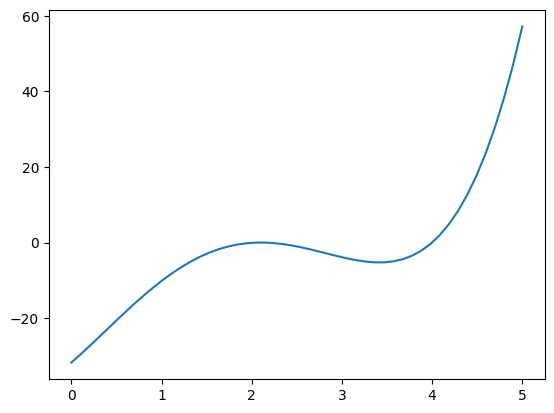

In [149]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
ddfunc1 = lambda x: 12.0*x**2 - 38.4*x + 12.9
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [150]:
data = GIGA_MEGA_NEEEEEEEWTON(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.0999999786199406
iter =  23


sol =  2.0999999786199406
iter =  23


/var/folders/w3/4l01d4cn60xc_qg78dq11vv40000gn/T/ipykernel_80079/1450705263.py:7: RuntimeWarning: divide by zero encountered in log
  p = [np.log(errors[i + 1] / errors[i]) / np.log(errors[i] / errors[i - 1])
/var/folders/w3/4l01d4cn60xc_qg78dq11vv40000gn/T/ipykernel_80079/1450705263.py:7: RuntimeWarning: invalid value encountered in scalar divide
  p = [np.log(errors[i + 1] / errors[i]) / np.log(errors[i] / errors[i - 1])


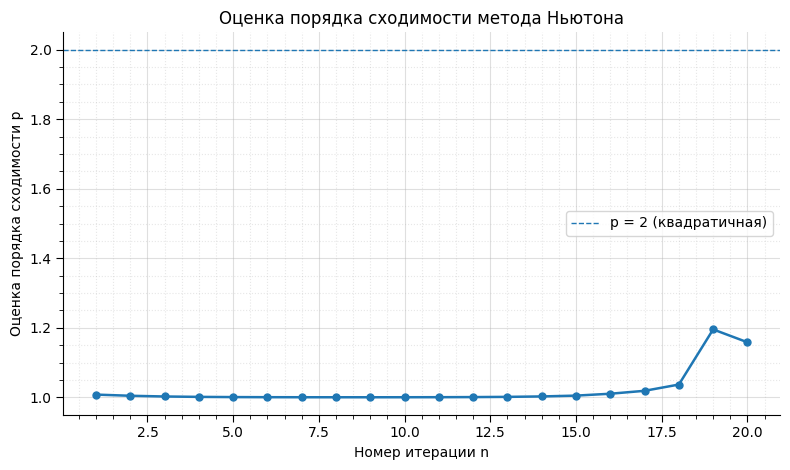

In [154]:
data = GIGA_MEGA_NEEEEEEEWTON(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])


plot_degree(data[3], data[0])

### Ответы на Нелинейное уравнение 2
**Почему график показывает линейную сходимость**

У многочлена $f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752$ в точке $x=2.1$ выполняется $f(2.1)=0$ и $f'(2.1)=0$, значит корень кратный. Факторизация: $f(x)=(x-2.1)^2(x^2-2.2x-7.2)$, т.е. кратность $m=2$.

Для кратного корня метода Ньютона: $e_{k+1}\approx(1-\tfrac{1}{m})e_k$, поэтому $p=1$ (линейная сходимость).


#### Нелинейное уравнение 3

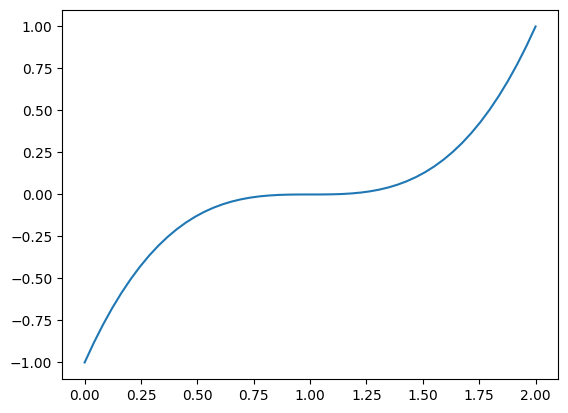

In [157]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
ddfunc2 = lambda x: 6*(x-1)
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [170]:
data = simple_newton(func2, dfunc2, 1.0000001)
print('sol = ', data[0])
print('iter = ', data[1])

data_mod = GIGA_MEGA_NEEEEEEEWTON(func2, dfunc2, 14887856228, ddfunc=ddfunc2)
print('sol = ', data_mod[0])
print('iter = ', data_mod[1])

sol =  1.0000000000017601
iter =  27
sol =  1.0
iter =  2


#### Нелинейное уравнение 4

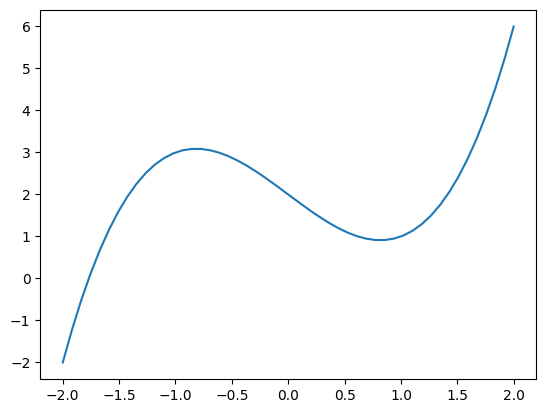

In [178]:
x = np.linspace(-2,2)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [179]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
print('sol = ', data[0])
print('iter = ', data[1])
data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

data = GIGA_MEGA_NEEEEEEEWTON(func3, dfunc3, 0)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10
More then 30 iterations!
sol =  nan
iter =  30
sol =  -1.7692923542386314
iter =  12


**Почему во 2-м случае нет сходимости и как это чинится**

Обычный шаг Ньютона: $x_{k+1}=x_k-\dfrac{f(x_k)}{f'(x_k)}$.

Для старта $x_0=0$: $f(0)=2$, $f'(0)=-2 \Rightarrow dx=-\dfrac{2}{-2}=+1 \Rightarrow x_1=1$.  
Для $x_1=1$: $f(1)=1$, $f'(1)=1 \Rightarrow dx=-\dfrac{1}{1}=-1 \Rightarrow x_2=0$.  
Получаем цикл $0 \leftrightarrow 1$ — итерации «пинг-понгуют» и не сходятся.

если два соседних шага почти равны по модулю и противоположны по знаку,
уменьшаем текущий шаг: $dx \leftarrow \tfrac12\,dx$. Это разрывает 2-цикл и даёт убывание остатка $|f(x_{k+1})|<|f(x_k)|$.


фикс:

```python
        if prev_dx is not None:
            if (abs(dx) > tol and abs(prev_dx) > tol and
                0.9 < abs(dx / prev_dx) < 1.5 and
                np.sign(dx) != np.sign(prev_dx)):
                dx *= 0.5
```
